In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advanced-dls-spring-2021/submission.csv
/kaggle/input/advanced-dls-spring-2021/train.csv
/kaggle/input/advanced-dls-spring-2021/test.csv


In [2]:
from tqdm.notebook import tqdm
import tqdm
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# 1. Загрузка данных (2 балла)
1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
train = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv')
test = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
sample_sub = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

Посмотрим на 5 случайных строк в датасете.

In [4]:
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1136,27,95.00,2462.55,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic),0
796,29,98.80,2807.1,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
2185,2,35.10,68.75,Female,0,Yes,No,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
25,38,20.25,814.75,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),0
2699,38,99.25,3777.15,Male,0,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1


Сразу стоит посмотреть на дубликаты и дубликаты без целевой переменной (т. е. одинаковые данные, но целевая переменная разная).

In [5]:
print(f"Duplicated rows: {train.duplicated(keep=False).sum()}")
print(f"Duplicated rows without target: {train.drop(columns=['Churn'], axis=1).duplicated(keep=False).sum()}") 

Duplicated rows: 28
Duplicated rows without target: 41


Сразу стоит из датасета такие строки удалить.

In [6]:
train = train.drop_duplicates().reset_index(drop=True)
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
display(train.info())
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   object 
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

None

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5268.00,5268.00,5268.00,5268.00
mean,32.48,64.98,0.16,0.26
std,24.53,30.18,0.37,0.44
min,0.00,18.25,0.00,0.00
25%,9.00,35.54,0.00,0.00
50%,29.00,70.45,0.00,0.00
75%,55.00,90.05,0.00,1.00
max,72.00,118.75,1.00,1.00


По идее, TotalSpent должен быть численным признаком, но он является object, стоит подробнее посмотреть, почему так получилось.

In [8]:
train.TotalSpent.value_counts()

TotalSpent
          9
19.75     8
20.2      7
20.05     5
19.9      5
         ..
950.2     1
4264      1
24.25     1
1090.6    1
1375.6    1
Name: count, Length: 4978, dtype: int64

В 9 строках значение TotalSpent равно ' ' (пробелу), теперь стоит посмотреть, почему так получилось.

In [9]:
train.loc[train.TotalSpent == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1704,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2538,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3070,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3688,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3992,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4315,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4538,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4585,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Очевидно, что у клиентов, у которых срок пользования < 1 месяца, потраченных средств не будет, так что можно просто заменить пустое значение на ноль.

На всякий случай можно проверить, у всех ли клиентов со значением 0 в ClientPeriod TotalSpent равен ' '.

In [10]:
train[train.ClientPeriod == 0].shape[0] == train[train.TotalSpent == ' '].shape[0]

True

In [11]:
train.loc[train.TotalSpent == ' ', 'TotalSpent'] = '0'
train['TotalSpent'] = train.TotalSpent.astype('float')

Сразу сделаем такое же преобразвание для теста, чтобы потом не забыть

In [12]:
test.loc[test.TotalSpent == ' ', 'TotalSpent'] = '0'
test['TotalSpent'] = test.TotalSpent.astype('float')

Посмотрим на пропуски в данных.

In [13]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Как видно, их нет.

In [14]:
display(train.info())
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

None

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5268.00,5268.00,5268.00,5268.00,5268.00
mean,32.48,64.98,2293.45,0.16,0.26
std,24.53,30.18,2269.11,0.37,0.44
min,0.00,18.25,0.00,0.00,0.00
25%,9.00,35.54,401.93,0.00,0.00
50%,29.00,70.45,1411.50,0.00,0.00
75%,55.00,90.05,3808.64,0.00,1.00
max,72.00,118.75,8684.80,1.00,1.00


In [15]:
#Численные признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

# 2. Анализ данных (3 балла)
1) Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - sns, pandas_visual_analysis, etc.

Сначала построим гистограммы и boxplot'ы для численных признаков.

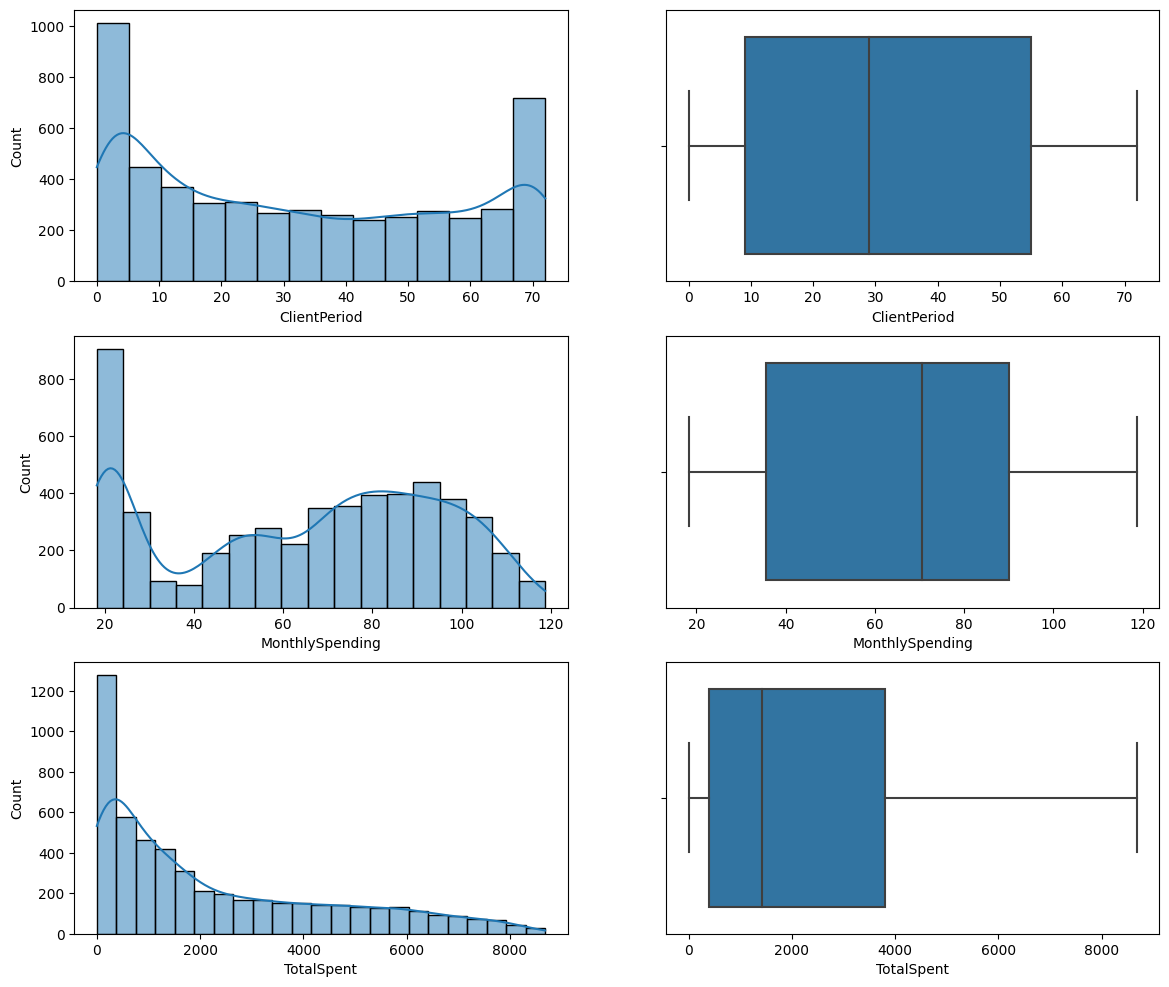

In [16]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(14, 12))
for i, col in enumerate(num_cols):
    sns.histplot(data=train, x=col, ax=axes[i][0], kde=True)
    sns.boxplot(data=train, x=col, ax=axes[i][1])

На первый взгляд, ярко выраженных выбросов, судя по boxplot'ам, нет, все данные укладываются в [Q1 - 1.5IQR, Q3 + 1.5IQR]

Для категориальных можно сделать value_counts, гистограммы и круговые диаграммы.

In [17]:
for cat_col in cat_cols:
    display(train[cat_col].value_counts())
    print()

Sex
Male      2647
Female    2621
Name: count, dtype: int64

IsSeniorCitizen
0    4427
1     841
Name: count, dtype: int64

HasPartner
No     2691
Yes    2577
Name: count, dtype: int64

HasChild
No     3662
Yes    1606
Name: count, dtype: int64

HasPhoneService
Yes    4747
No      521
Name: count, dtype: int64

HasMultiplePhoneNumbers
No                  2497
Yes                 2250
No phone service     521
Name: count, dtype: int64

HasInternetService
Fiber optic    2335
DSL            1798
No             1135
Name: count, dtype: int64

HasOnlineSecurityService
No                     2604
Yes                    1529
No internet service    1135
Name: count, dtype: int64

HasOnlineBackup
No                     2324
Yes                    1809
No internet service    1135
Name: count, dtype: int64

HasDeviceProtection
No                     2309
Yes                    1824
No internet service    1135
Name: count, dtype: int64

HasTechSupportAccess
No                     2596
Yes                    1537
No internet service    1135
Name: count, dtype: int64

HasOnlineTV
No                     2091
Yes                    2042
No internet service    1135
Name: count, dtype: int64

HasMovieSubscription
No                     2073
Yes                    2060
No internet service    1135
Name: count, dtype: int64

HasContractPhone
Month-to-month    2906
Two year          1280
One year          1082
Name: count, dtype: int64

IsBillingPaperless
Yes    3140
No     2128
Name: count, dtype: int64

PaymentMethod
Electronic check             1780
Mailed check                 1186
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: count, dtype: int64

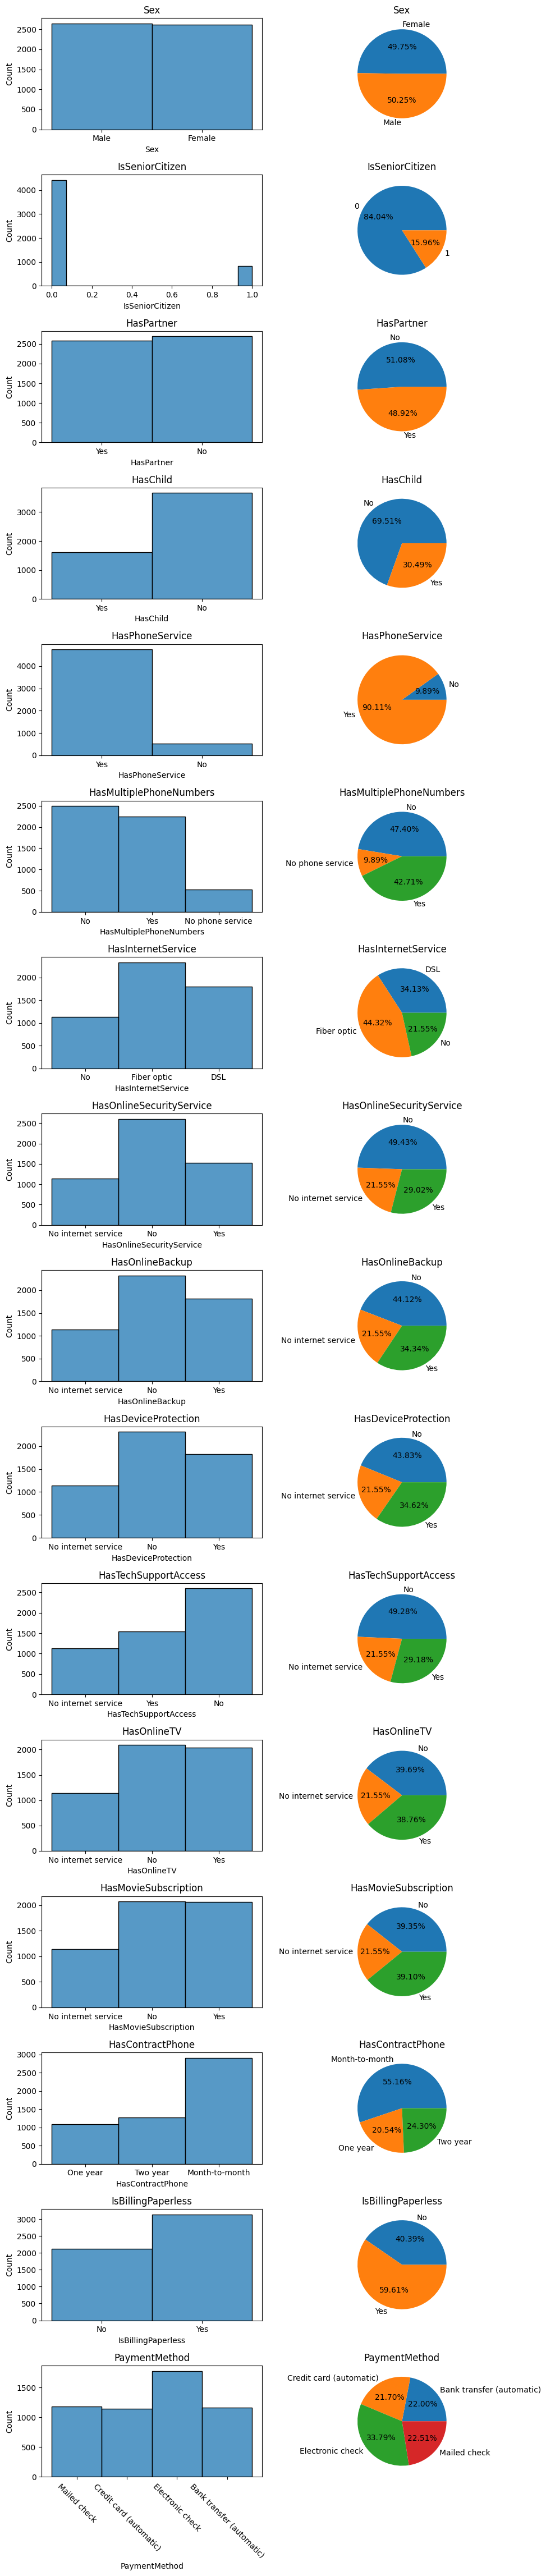

In [18]:
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=2, figsize=(10, 46))
for i, col in enumerate(cat_cols):
    sns.histplot(data=train, x=col, ax=axes[i][0])
    train.groupby(col).size().plot(kind='pie', autopct='%.2f%%', ax=axes[i][1])
    axes[i][0].set_title(col)
    axes[i][1].set_title(col)
axes[-1][0].set_xticks(axes[-1][0].get_xticks())
axes[-1][0].set_xticklabels(axes[-1][0].get_xticklabels(), rotation=315)
plt.tight_layout()

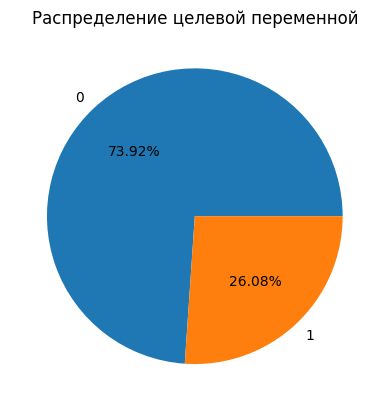

In [19]:
ax = train.groupby(target_col).size().plot(kind='pie', autopct='%.2f%%')
ax.set_title('Распределение целевой переменной');

Распределение целевой переменной не идеально сбалансированно, но и не сказать что одного класса во много раз больше, чем другого. Мы будем использовать ROC_AUC, а не accuracy, так что всё нормально.

# 3. Применение линейных моделей (3 балла)
1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).

(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [22]:
# Создаем предобработку численных данных с помощью StandardScaler,
# категориальных с помощью OrdinalEncoder (по сути label encoder для нецелевых переменных) и OneHot
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', Pipeline([
            ('label_encoder', OrdinalEncoder()),
            ('onehot', OneHotEncoder())
        ]), cat_cols)
    ])

# Далее пихаем это всё в пайплайн
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logisticregression', LogisticRegression())
])

param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__solver': ['lbfgs', 'newton-cg', 'liblinear', 'newton-cholesky']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

X = train[feature_cols]
y = train[target_col]

grid_search.fit(X, y)

print("Наилучший параметр C:", grid_search.best_params_['logisticregression__C'])
print("Наилучший solver:", grid_search.best_params_['logisticregression__solver'])
print("ROC-AUC наилучшей модели:", grid_search.best_score_)

Наилучший параметр C: 10
Наилучший solver: lbfgs
ROC-AUC наилучшей модели: 0.8445870371038293


In [23]:
logreg = grid_search.best_estimator_

Можно посмотреть, как именно происходит обработка данных и предсказания моделью логистической регрессии

In [24]:
logreg.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['ClientPeriod', 'MonthlySpending',
                                   'TotalSpent']),
                                 ('cat',
                                  Pipeline(steps=[('label_encoder',
                                                   OrdinalEncoder()),
                                                  ('onehot', OneHotEncoder())]),
                                  ['Sex', 'IsSeniorCitizen', 'HasPartner',
                                   'HasChild', 'HasPhoneService',
                                   'HasMultiplePhoneNumbers',
                                   'HasInternetService',
                                   'HasOnlineSecurityService', 'HasOnlineBackup',
                                   'HasDeviceProtection', 'HasTechSupportAccess',
                                   'HasOnlineTV', 'HasMovieSubscription',
                                   'HasContrac

In [25]:
logreg_pred = logreg.predict(test)
submission_logreg = pd.DataFrame({'Id': test.index, 'Churn': logreg_pred})
submission_logreg.to_csv('sub_logreg.csv', index=False)
submission_logreg.head()

,Id,Churn
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


# Применение градиентного бустинга (2 балла)
Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

В качестве библиотеки для градиентного бустинга будем использовать catboost.

In [26]:
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import KFold
import optuna
from sklearn.metrics import roc_auc_score

Тут воспользуемся таким прекрасным инструментом, как optuna - автоматический подбор гиперпараметров. Запустим один цикл (за сотыми процентов гнаться особо нет желания).

In [27]:
def objective(trial):
    X = train[feature_cols]
    y = train[target_col]
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # здесь задаем параметры для перебора и фиксируем некоторые другие
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
        'depth': trial.suggest_int('depth', 2, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 50),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "used_ram_limit": "24gb",
        'loss_function': 'Logloss',
        "eval_metric": "AUC"
    }
    
    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 20)
        
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    
    scores = []
    # используем кросс-валидацию для поиска гиперпараметров
    for train_index, test_index in kf.split(X):
        train_pool = Pool (
            data=X.iloc[train_index],
            label=y.iloc[train_index],
            cat_features=cat_cols
        )
        test_pool = Pool (
            data=X.iloc[test_index],
            label=y.iloc[test_index],
            cat_features=cat_cols
        )
        
        
        model = CatBoostClassifier(
            **params,
            iterations=10000,
            verbose=False,
            use_best_model=True,
            thread_count=-1,
            random_seed=42
        )
        model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=500)
        
        scores.append(model.best_score_['validation']['AUC'])
    score = np.mean(scores)
        

    return score

In [23]:
# запускаем процесс
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner(), study_name='catboost')
study.optimize(objective,
               n_trials=100,
               n_jobs = -1,
               show_progress_bar=True)

[I 2023-10-22 17:54:38,321] A new study created in memory with name: catboost


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-10-22 17:56:17,751] Trial 0 finished with value: 0.8468166899514739 and parameters: {'learning_rate': 0.1561303897220661, 'depth': 5, 'l2_leaf_reg': 42.146799395695005, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9853149797644232}. Best is trial 0 with value: 0.8468166899514739.
[I 2023-10-22 17:59:04,045] Trial 2 finished with value: 0.8416175799866614 and parameters: {'learning_rate': 0.14748505094877454, 'depth': 5, 'l2_leaf_reg': 49.06687423444895, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 18.275929552774123}. Best is trial 0 with value: 0.8468166899514739.
[I 2023-10-22 17:59:25,096] Trial 1 finished with value: 0.8432168802276555 and parameters: {'learning_rate': 0.061701316650181956, 'depth': 3, 'l2_leaf_reg': 1.126311855173165, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 17.438653824256107}. Best is trial 0 with value: 0.8468166899514739.
[I 2023-10-22 17:59:38,377] T

Тут я выписал лучшие параметры, так как каждый раз запускать оптуну и ждать 2 часа не особо хочется.

In [28]:
best_params = {
    'learning_rate': 0.04644218107675181,
    'depth': 3,
    'l2_leaf_reg': 43.341399259029885,
    'boosting_type': 'Ordered',
    'bootstrap_type': 'MVS'
}

Далее запустим CatBoostClassifier с подобранными параметрами, кол-во итераций было подобрано с помощью запуска модели на кросс-валидации на всех данных с use_best_model=True, в среднем получалось 450-470 итераций.

In [29]:
X = train[feature_cols]
y = train[target_col]
cbc = CatBoostClassifier(
            **best_params,
            iterations=500,
            verbose=100,
            thread_count=-1,
            random_seed=42,
            loss_function='Logloss',
            eval_metric='AUC',
            cat_features=cat_cols
        )
cbc.fit(X, y)

0:	total: 68.1ms	remaining: 34s
100:	total: 1.16s	remaining: 4.57s
200:	total: 2.22s	remaining: 3.3s
300:	total: 3.32s	remaining: 2.19s
400:	total: 4.42s	remaining: 1.09s
499:	total: 5.52s	remaining: 0us


In [30]:
cbc_pred = cbc.predict(test)
submission_cbc = pd.DataFrame({'Id': test.index, 'Churn': cbc_pred})
submission_cbc.to_csv('sub_catboost.csv', index=False)
submission_cbc.head()

,Id,Churn
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


Можно много еще чего попробовать, например хотя бы сблендить предсказания этих двух моделей (через predict_proba), попробовать постакать больше моделей, но, пожалуй, ограничусь этим.